# Tesla vs GameStop Stock & Revenue Analysis

### Step 1: Extracting Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf
import pandas as pd

# Load Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Display the first few rows
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Step 2: Extracting Tesla Revenue Data Using Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Necessary import to use StringIO

# URL for the Tesla page on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"  # Fakes a browser visit
}

# Request the HTML page
html_data = requests.get(url, headers=headers).text
# Using BeautifulSoup to parse the HTML
soup = BeautifulSoup(html_data, "html.parser")
# Finding all tables on the page
all_tables = soup.find_all("table")
# Initializing the variable to store revenue data
tesla_revenue_df = None

# Loop to find the relevant table (Tesla Quarterly Revenue)
for table in all_tables:
    # Using StringIO to pass the HTML of the table
    html_table = str(table)
    table_io = StringIO(html_table)
    df = pd.read_html(table_io)[0]  # Reads the table directly from StringIO
    # Checks if the table contains "Tesla Quarterly Revenue"
    if "Tesla Quarterly Revenue" in df.columns[0]:
        tesla_revenue_df = df
        break

# If the table was found, process it
if tesla_revenue_df is not None:
    tesla_revenue_df.columns = ["Date", "Revenue"]
    tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].replace("[$,]", "", regex=True)
    tesla_revenue_df = tesla_revenue_df.dropna()

    # Using .loc[] to safely modify the column
    tesla_revenue_df.loc[:, "Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"])

    # Displaying the first few rows to confirm everything is correct
    print(tesla_revenue_df.head())

         Date Revenue
0  2024-12-31   25707
1  2024-09-30   25182
2  2024-06-30   25500
3  2024-03-31   21301
4  2023-12-31   25167


### Step 3: Extracting GameStop Stock Data Using yfinance

In [21]:
# Load GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Display first few rows
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674833,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Step 4: Extracting GameStop Revenue Data Using Web Scraping

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Necessary import to use StringIO

# URL for the GameStop page on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"  # Fakes a browser visit
}

# Request the HTML page
html_data = requests.get(url, headers=headers).text
# Using BeautifulSoup to parse the HTML
soup = BeautifulSoup(html_data, "html.parser")
# Finding all tables on the page
all_tables = soup.find_all("table")

# Initializing the variable to store revenue data
gamestop_revenue_df = None

# Loop to find the relevant table (GameStop Quarterly Revenue)
for table in all_tables:
    # Check if the table contains 'Quarterly Revenue' in the string
    if "Quarterly Revenue" in str(table):
        html_table = str(table)
        table_io = StringIO(html_table)
        gamestop_revenue_df = pd.read_html(table_io)[0]  # Reads the table directly from StringIO
        break

# If the table was found, process it
if gamestop_revenue_df is not None:
    gamestop_revenue_df.columns = ["Date", "Revenue"]
    gamestop_revenue_df["Revenue"] = gamestop_revenue_df["Revenue"].replace("[$,]", "", regex=True)
    gamestop_revenue_df = gamestop_revenue_df.dropna()

    # Using .loc[] to safely modify the column
    gamestop_revenue_df.loc[:, "Revenue"] = pd.to_numeric(gamestop_revenue_df["Revenue"])

    # Displaying the first few rows to confirm everything is correct
    print(gamestop_revenue_df.head())
else:
    print("Could not find the correct table.")

         Date Revenue
0  2025-01-31    1283
1  2024-10-31     860
2  2024-07-31     798
3  2024-04-30     882
4  2024-01-31    1794


### Step 5: Tesla Stock and Revenue Dashboard

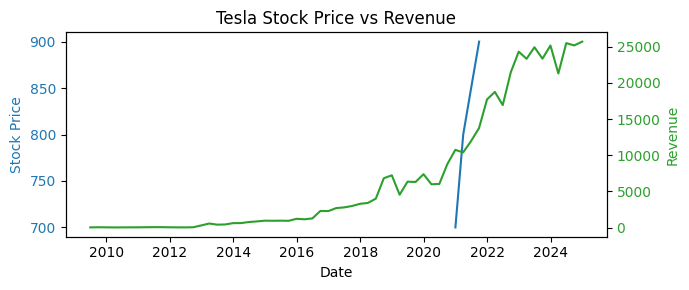

In [35]:
import matplotlib.pyplot as plt # type: ignore
import pandas as pd

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(7, 3))

# Plot Tesla stock price on the first axis
ax1.plot(tesla_data.index, tesla_data["Close"], color='tab:blue', label="Tesla Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second axis to plot the revenue
ax2 = ax1.twinx()  # This shares the same x-axis as ax1
ax2.plot(pd.to_datetime(tesla_revenue_df["Date"]), tesla_revenue_df["Revenue"], color='tab:green', label="Tesla Revenue")
ax2.set_ylabel("Revenue", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set the title and display the plot
plt.title("Tesla Stock Price vs Revenue")
fig.tight_layout()  # Ensures everything fits without overlap

# Show the plot
plt.show()

### Step 6: GameStop Stock and Revenue Dashboard

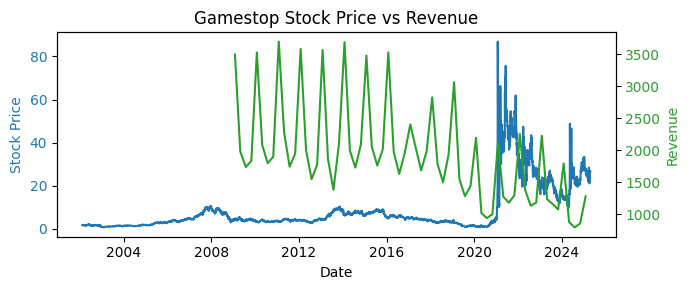

In [36]:
import matplotlib.pyplot as plt # type: ignore
import pandas as pd

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(7, 3))

# Plot gamestop stock price on the first axis
ax1.plot(gme_data.index, gme_data["Close"], color='tab:blue', label="gamestop Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second axis to plot the revenue
ax2 = ax1.twinx()  # This shares the same x-axis as ax1
ax2.plot(pd.to_datetime(gamestop_revenue_df["Date"]), gamestop_revenue_df["Revenue"], color='tab:green', label="gamestop Revenue")
ax2.set_ylabel("Revenue", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set the title and display the plot
plt.title("Gamestop Stock Price vs Revenue")
fig.tight_layout()  # Ensures everything fits without overlap

# Show the plot
plt.show()